In [4]:
import numpy as np
import matplotlib.pylab as plt
import cv2
import tensorflow as tf
from tensorflow import keras

In [5]:
def read_img(image, size=False, color = cv2.COLOR_RGB2BGR):
    img = cv2.imread(image)
    if color:
        try:
            img = cv2.cvtColor(img, color)
        except:
            raise Exception("Provide color in a format like cv2.COLOR_RGB2BGR")
    if size:
        try:
            s1,s2 = size
            img = cv2.resize(img, (s1,s2))
        except:
            raise Exception("Provide size in a format (s1,s2)")
    return img

In [135]:
def cv2_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return np.expand_dims(img, axis=-1)

# ImageRead

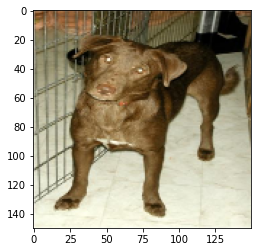

In [8]:
my_first_dog = read_img("CATS_DOGS/train/DOG/1.jpg", size=(150,150))
plt.imshow(my_first_dog)

In [9]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=30,
                                                         width_shift_range=0.1,
                                                         height_shift_range=0.1,
                                                         rescale=1/255,
                                                         shear_range=0.2,
                                                         zoom_range=0.2,
                                                         horizontal_flip=True,
                                                         fill_mode='nearest' #fill missing elemnts on edges
                                                        )

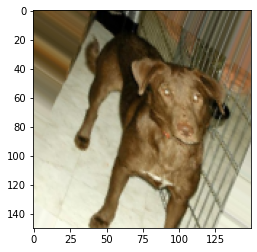

In [11]:
my_first_dog_tweak = image_gen.random_transform(my_first_dog)
plt.imshow(my_first_dog_tweak)

# Model

In [177]:
img_input = (150,150,3)

input_ = keras.layers.Input(shape=(img_input))
x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.models.Model(inputs = input_, outputs = x)


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [178]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 34, 34, 32)        924

In [179]:
batch_size = 16

train_gen = image_gen.flow_from_directory('./CATS_DOGS/train',
                                               target_size=img_input[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

test_gen = image_gen.flow_from_directory('./CATS_DOGS/test',
                                               target_size=img_input[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [19]:
train_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [181]:
results = model.fit_generator(train_gen,epochs=50,
                              steps_per_epoch=150,
                              validation_data=test_gen,
                              validation_steps=12)

Epoch 1/50


/var/folders/yt/vsz4v53j4bv674jbw4t304p80000gn/T/ipykernel_44989/106677856.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_gen,epochs=50,


 74/150 [=============>................] - ETA: 10s - loss: 0.6853 - accuracy: 0.5642

/Users/dr.rub/opt/anaconda3/envs/gig/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 [==============================] - 22s 147ms/step - loss: 0.6800 - accuracy: 0.5808 - val_loss: 0.6606 - val_accuracy: 0.6302
Epoch 2/50
150/150 [==============================] - 22s 143ms/step - loss: 0.6740 - accuracy: 0.5793 - val_loss: 0.6728 - val_accuracy: 0.5885
Epoch 3/50
150/150 [==============================] - 22s 144ms/step - loss: 0.6699 - accuracy: 0.5933 - val_loss: 0.6716 - val_accuracy: 0.5990
Epoch 4/50
150/150 [==============================] - 22s 146ms/step - loss: 0.6696 - accuracy: 0.5788 - val_loss: 0.6471 - val_accuracy: 0.6354
Epoch 5/50
150/150 [==============================] - 22s 145ms/step - loss: 0.6655 - accuracy: 0.6046 - val_loss: 0.6376 - val_accuracy: 0.6771
Epoch 6/50
150/150 [==============================] - 22s 145ms/step - loss: 0.6527 - accuracy: 0.6167 - val_loss: 0.6550 - val_accuracy: 0.6302
Epoch 7/50
150/150 [==============================] - 22s 146ms/step - loss: 0.6396 - accuracy: 0.6292 - val_loss: 0.6322 - val_accuracy: 0.6

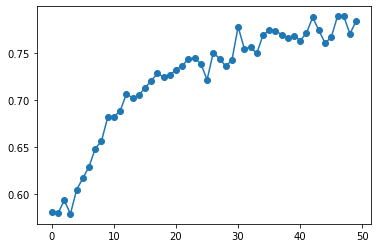

In [183]:
hist = results.history['accuracy']
plt.plot(hist, "-o")

In [187]:
a_dog.shape

(150, 150, 3)

In [194]:
a_dog = read_img("CATS_DOGS/train/DOG/3.jpg", size=(150,150))
model.predict(np.expand_dims(a_dog, axis=0))

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

In [195]:
a_dog = read_img("CATS_DOGS/train/CAT/3.jpg", size=(150,150))
model.predict(np.expand_dims(a_dog, axis=0))

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)